<a href="https://colab.research.google.com/github/Akashkunwar/dscodes/blob/master/Covid_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
## Retreving Data
# Assigning Github URLs
cases_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

# Reading URLs through Pandas liberary
total_cases = pd.read_csv(cases_url)
total_deaths = pd.read_csv(deaths_url)
total_recovered = pd.read_csv(recovered_url)


# #Extracting useful numerical colums
# total_cases_num = total_cases.iloc[:, 4:]
# total_deaths_num = total_deaths.iloc[:, 4:]
# total_recovered_num = total_recovered.iloc[:, 4:]

# #Converting and replacing dates into datetime format
# total_cases_num.columns = pd.to_datetime(total_cases_num.columns)
# total_deaths_num.columns = pd.to_datetime(total_deaths_num.columns)
# total_recovered_num.columns = pd.to_datetime(total_recovered_num.columns)
# # total_cases_num = total_cases_num.T.set_index(pd.to_datetime(total_cases_num.T.index, format = "%m/%d/%y")).T
# # total_deaths_num = total_deaths_num.T.set_index(pd.to_datetime(total_deaths_num.T.index, format = "%m/%d/%y")).T
# # total_recovered_num = total_recovered_num.T.set_index(pd.to_datetime(total_recovered_num.T.index, format = "%m/%d/%y")).T

# #Extracting country/region colums and renaming country/region into country
# total_cases_cat = pd.DataFrame(total_cases["Country/Region"]).rename(columns={'Country/Region': 'Country'})
# total_deaths_cat = pd.DataFrame(total_deaths["Country/Region"]).rename(columns={'Country/Region': 'Country'})
# total_recovered_cat = pd.DataFrame(total_recovered["Country/Region"]).rename(columns={'Country/Region': 'Country'})


## Cleaning Data
# Extreacting and storing column dates in dates
dates = total_cases.columns[4:]

# Reshaping total cases column from wide shape to df shape
total_cases_df = total_cases.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
# Reshaping total deaths column from wide shape to df shape
total_deaths_df = total_deaths.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
# Reshaping total recovered column from wide shape to df shape
total_recovered_df = total_recovered.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

# Merging total_cases_df and total_deaths_df
covid_df = total_cases_df.merge(
  right=total_deaths_df, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging covid_df and total_recovered_df
covid_df = covid_df.merge(
  right=total_recovered_df, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

# Converting Date to proper datetime format
covid_df["Date"] = pd.to_datetime(covid_df["Date"])

# Inserting converted date to full table
covid_df = covid_df.sort_values(['Country/Region', 'Date'])
#covid_df = covid_df.sort_values(['Country/Region', 'Date'], ascending=[True, True])
# Reseting Index
# covid_df = covid_df.reset_index()

# Copying covid_df to covid_df
#covid_df = covid_df.copy()

# Renaming column names
covid_df = covid_df.rename(columns={'Country/Region': 'Country',
                                    'Province/State':'Province',
                                    'Confirmed': 'Total cases',
                                    'Deaths': 'Total deaths',
                                    'Recovered':'Total recovered'})

# Filling NaN value of provinve with country name and storing it in coiuntry column
covid_df["Province"] = covid_df["Province"].fillna(covid_df["Country"])
covid_df["Country"] = covid_df["Province"]

# Adding New cases, New deaths, New recovered to covid_df
covid_df["New cases"] = covid_df.groupby('Country')['Total cases'].diff().fillna(0)
covid_df["New deaths"] = covid_df.groupby('Country')['Total deaths'].diff().fillna(0)
covid_df["New recovered"] = covid_df.groupby('Country')['Total recovered'].diff().fillna(0)

# Converting float value to int in covid_df columns
covid_df["Total recovered"] = covid_df["Total recovered"].fillna(0)
covid_df["Total recovered"] = covid_df["Total recovered"].astype(int).fillna(0)
covid_df["New cases"] = covid_df["New cases"].astype(int)
covid_df["New deaths"] = covid_df["New deaths"].astype(int)
covid_df["New recovered"] = covid_df["New recovered"].astype(int)

# Arranging Columns
covid_df = covid_df[['Date', 'Province', 'Country','Lat','Long',
 'Total cases', 'Total deaths','Total recovered', 'New cases','New deaths','New recovered']]

# Removind unnecessary columns
covid_df = covid_df.drop(['Province', 'Lat', 'Long'],axis=1)

# Reseting jumbled index in order
covid_df = covid_df.reset_index(drop=True)

covid_df

Date      Country  ...  New deaths  New recovered
0      2020-01-22  Afghanistan  ...           0              0
1      2020-01-23  Afghanistan  ...           0              0
2      2020-01-24  Afghanistan  ...           0              0
3      2020-01-25  Afghanistan  ...           0              0
4      2020-01-26  Afghanistan  ...           0              0
...           ...          ...  ...         ...            ...
202435 2022-01-09     Zimbabwe  ...           0              0
202436 2022-01-10     Zimbabwe  ...          32              0
202437 2022-01-11     Zimbabwe  ...           0              0
202438 2022-01-12     Zimbabwe  ...          35              0
202439 2022-01-13     Zimbabwe  ...           7              0

[202440 rows x 8 columns]

In [11]:
covid_df

Province/State Country/Region        Lat  ...  Confirmed Deaths  Recovered
0                 NaN    Afghanistan  33.939110  ...          0      0        0.0
280               NaN    Afghanistan  33.939110  ...          0      0        0.0
560               NaN    Afghanistan  33.939110  ...          0      0        0.0
840               NaN    Afghanistan  33.939110  ...          0      0        0.0
1120              NaN    Afghanistan  33.939110  ...          0      0        0.0
...               ...            ...        ...  ...        ...    ...        ...
201319            NaN       Zimbabwe -19.015438  ...     221918   5148        0.0
201599            NaN       Zimbabwe -19.015438  ...     223000   5180        0.0
201879            NaN       Zimbabwe -19.015438  ...     223000   5180        0.0
202159            NaN       Zimbabwe -19.015438  ...     224433   5215        0.0
202439            NaN       Zimbabwe -19.015438  ...     225084   5222        0.0

[202440 rows x 8 columns]

In [3]:
# Filling NaN value of provinve with country name and storing it in coiuntry column
covid_df["Province"] = covid_df["Province"].fillna(covid_df["Country"])
covid_df["Country"] = covid_df["Province"]

KeyError: ignored

In [ ]:
a = covid_df.loc[covid_df['Province'].isnull(), 'Province'] = covid_df[covid_df['Province'].isnull()]['Country'].replace(covid_df['Country'])

In [11]:
covid_df["Province"] = covid_df["Province"].fillna(covid_df["Country"])
covid_df["Country"] = covid_df["Province"]

In [18]:
covid_df.drop(['Province', 'Lat', 'Long'], axis=1, inplace=True)

In [19]:
covid_df

Date      Country  ...  New deaths  New recovered
0      2020-01-22  Afghanistan  ...           0              0
1      2020-01-23  Afghanistan  ...           0              0
2      2020-01-24  Afghanistan  ...           0              0
3      2020-01-25  Afghanistan  ...           0              0
4      2020-01-26  Afghanistan  ...           0              0
...           ...          ...  ...         ...            ...
202435 2022-01-09     Zimbabwe  ...           0              0
202436 2022-01-10     Zimbabwe  ...          32              0
202437 2022-01-11     Zimbabwe  ...           0              0
202438 2022-01-12     Zimbabwe  ...          35              0
202439 2022-01-13     Zimbabwe  ...           7              0

[202440 rows x 8 columns]

In [9]:
covid_df["Province"].value_counts()

Diamond Princess            1446
Serbia                       723
Guangdong                    723
Colombia                     723
Turks and Caicos Islands     723
                            ... 
Thailand                     723
Guizhou                      723
Suriname                     723
Tonga                        723
Iceland                      723
Name: Province, Length: 279, dtype: int64

In [11]:
covid_df[covid_df['Country']=="India"]

Date Country  Total cases  ...  New cases  New deaths  New recovered
106281 2020-01-22   India            0  ...          0           0              0
106282 2020-01-23   India            0  ...          0           0              0
106283 2020-01-24   India            0  ...          0           0              0
106284 2020-01-25   India            0  ...          0           0              0
106285 2020-01-26   India            0  ...          0           0              0
...           ...     ...          ...  ...        ...         ...            ...
106999 2022-01-09   India     35707727  ...     179723         146              0
107000 2022-01-10   India     35875790  ...     168063         277              0
107001 2022-01-11   India     35875790  ...          0           0              0
107002 2022-01-12   India     36317927  ...     442137         822              0
107003 2022-01-13   India     36317927  ...          0          96              0

[723 rows x 8 columns]

In [ ]:
covid_df.isna().sum()

Province/State     139346
Country/Region          0
Lat                  1444
Long                 1444
Date                    0
Confirmed               0
Deaths                  0
Recovered               0
Daily cases             0
Daily deaths            0
Daily recovered         0
dtype: int64

In [ ]:
# total_cases.head(3)

Province/State Country/Region       Lat  ...  1/10/22  1/11/22  1/12/22
0            NaN    Afghanistan  33.93911  ...   158394   158471   158511
1            NaN        Albania  41.15330  ...   220487   222664   224569
2            NaN        Algeria  28.03390  ...   222639   223196   223806

[3 rows x 726 columns]

In [ ]:
# total_cases_num.head(3)

2020-01-22  2020-01-23  2020-01-24  ...  2022-01-10  2022-01-11  2022-01-12
0           0           0           0  ...      158394      158471      158511
1           0           0           0  ...      220487      222664      224569
2           0           0           0  ...      222639      223196      223806

[3 rows x 722 columns]

In [ ]:
# result = total_cases_num.copy()
# result.insert(0,"Country",total_cases_cat)
# result.head(3)

Country  2020-01-22 00:00:00  ...  2022-01-11 00:00:00  2022-01-12 00:00:00
0  Afghanistan                    0  ...               158471               158511
1      Albania                    0  ...               222664               224569
2      Algeria                    0  ...               223196               223806

[3 rows x 723 columns]

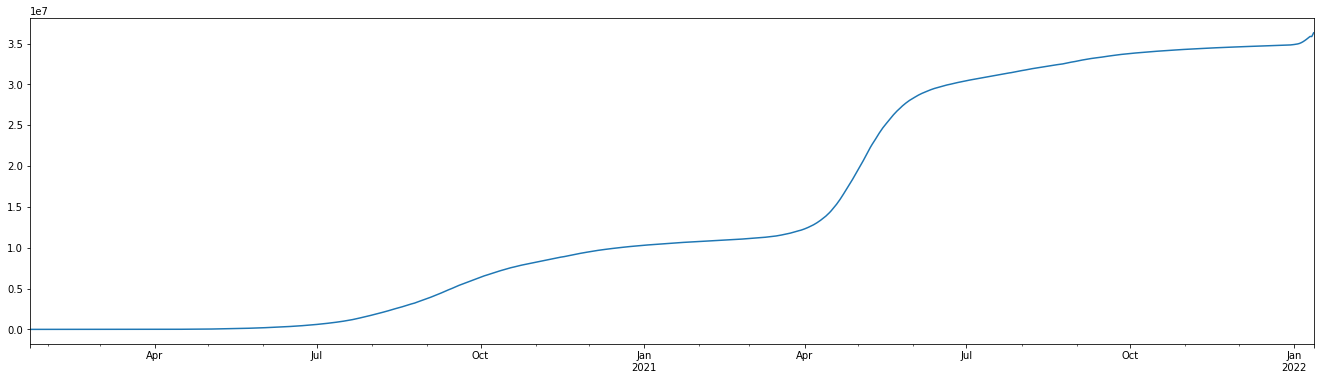

In [ ]:
# total_cases[total_cases['Country/Region']=='India']
# plt.figure(figsize=(23,6))
# total_cases_num.iloc[total_cases[total_cases['Country/Region']=='India'].index[0]].plot()

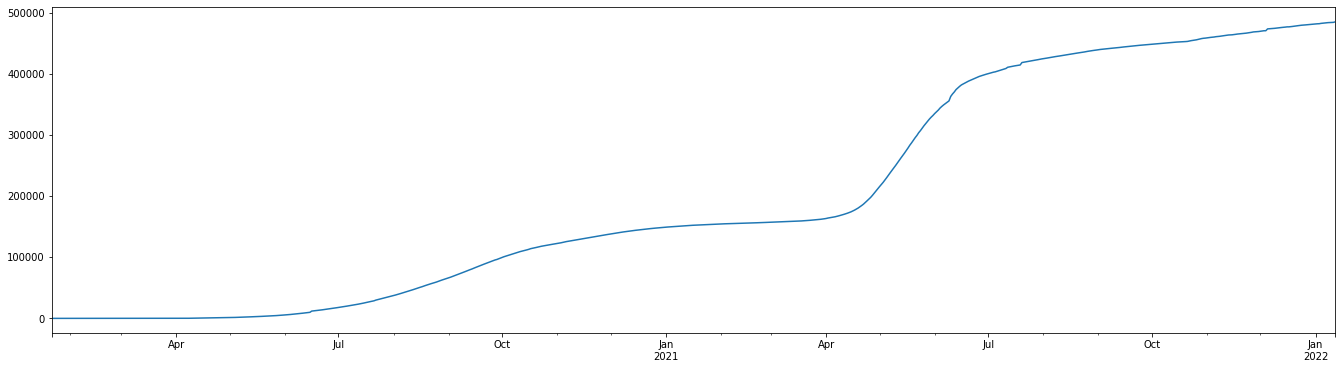

In [ ]:
# total_deaths[total_deaths['Country/Region']=='India']
# plt.figure(figsize=(23,6))
# total_deaths_num.iloc[total_deaths[total_deaths['Country/Region']=='India'].index[0]].plot()

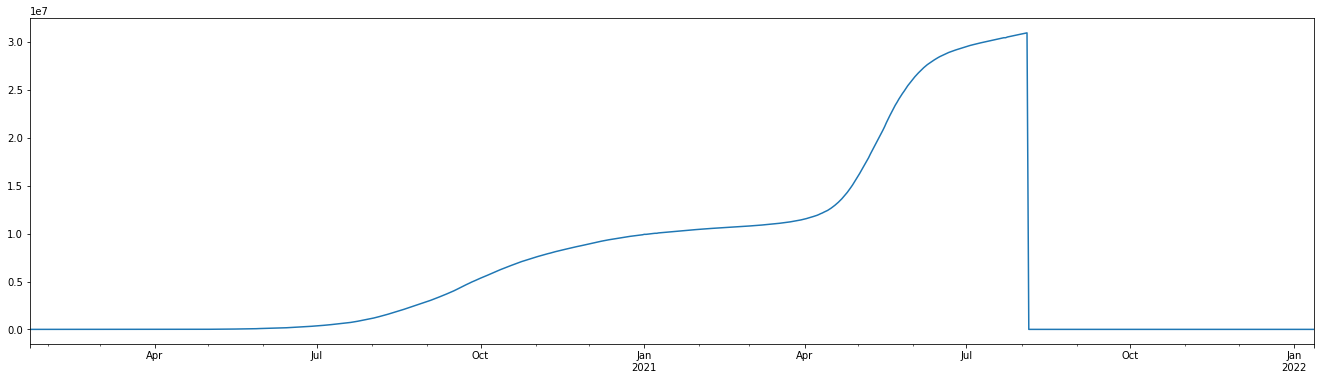

In [ ]:
# total_recovered[total_recovered['Country/Region']=='India']
# plt.figure(figsize=(23,6))
# total_recovered_num.iloc[total_recovered[total_recovered['Country/Region']=='India'].index[0]].plot()

In [ ]:
pd.set_option('display.max_rows', covid_df.shape[0]+1)
covid_df[covid_df["Country"]=="France"] 🇫🇷 

Date                   Province  ... New deaths  New recovered
86037 2020-01-22              French Guiana  ...          0              0
86038 2020-01-22           French Polynesia  ...          0              0
86039 2020-01-22                 Guadeloupe  ...          0              0
86040 2020-01-22                 Martinique  ...          0              0
86041 2020-01-22                    Mayotte  ...          0              0
86042 2020-01-22              New Caledonia  ...          0              0
86043 2020-01-22                    Reunion  ...          0              0
86044 2020-01-22           Saint Barthelemy  ...          0              0
86045 2020-01-22  Saint Pierre and Miquelon  ...          0              0
86046 2020-01-22                  St Martin  ...          0              0
86047 2020-01-22          Wallis and Futuna  ...          0              0
86048 2020-01-22                        NaN  ...          0              0
86049 2020-01-23              French Guiana  ...          0              0
86050 2020-01-23           French Polynesia  ...          0              0
86051 2020-01-23                 Guadeloupe  ...          0              0
86052 2020-01-23                 Martinique  ...          0              0
86053 2020-01-23                    Mayotte  ...          0              0
86054 2020-01-23              New Caledonia  ...          0              0
86055 2020-01-23                    Reunion  ...          0              0
86056 2020-01-23           Saint Barthelemy  ...          0              0
86057 2020-01-23  Saint Pierre and Miquelon  ...          0              0
86058 2020-01-23                  St Martin  ...          0              0
86059 2020-01-23          Wallis and Futuna  ...          0              0
86060 2020-01-23                        NaN  ...          0              0
86061 2020-01-24              French Guiana  ...          0              0
86062 2020-01-24           French Polynesia  ...          0              0
86063 2020-01-24                 Guadeloupe  ...          0              0
86064 2020-01-24                 Martinique  ...          0              0
86065 2020-01-24                    Mayotte  ...          0              0
86066 2020-01-24              New Caledonia  ...          0              0
86067 2020-01-24                    Reunion  ...          0              0
86068 2020-01-24           Saint Barthelemy  ...          0              0
86069 2020-01-24  Saint Pierre and Miquelon  ...          0              0
86070 2020-01-24                  St Martin  ...          0              0
86071 2020-01-24          Wallis and Futuna  ...          0              0
86072 2020-01-24                        NaN  ...          0              0
86073 2020-01-25              French Guiana  ...          0              0
86074 2020-01-25           French Polynesia  ...          0              0
86075 2020-01-25                 Guadeloupe  ...          0              0
86076 2020-01-25                 Martinique  ...          0              0
86077 2020-01-25                    Mayotte  ...          0              0
86078 2020-01-25              New Caledonia  ...          0              0
86079 2020-01-25                    Reunion  ...          0              0
86080 2020-01-25           Saint Barthelemy  ...          0              0
86081 2020-01-25  Saint Pierre and Miquelon  ...          0              0
86082 2020-01-25                  St Martin  ...          0              0
86083 2020-01-25          Wallis and Futuna  ...          0              0
86084 2020-01-25                        NaN  ...          0              0
86085 2020-01-26              French Guiana  ...          0              0
86086 2020-01-26           French Polynesia  ...          0              0
86087 2020-01-26                 Guadeloupe  ...          0              0
86088 2020-01-26                 Martinique  ...          0              0
86089 2020-01-26                    M

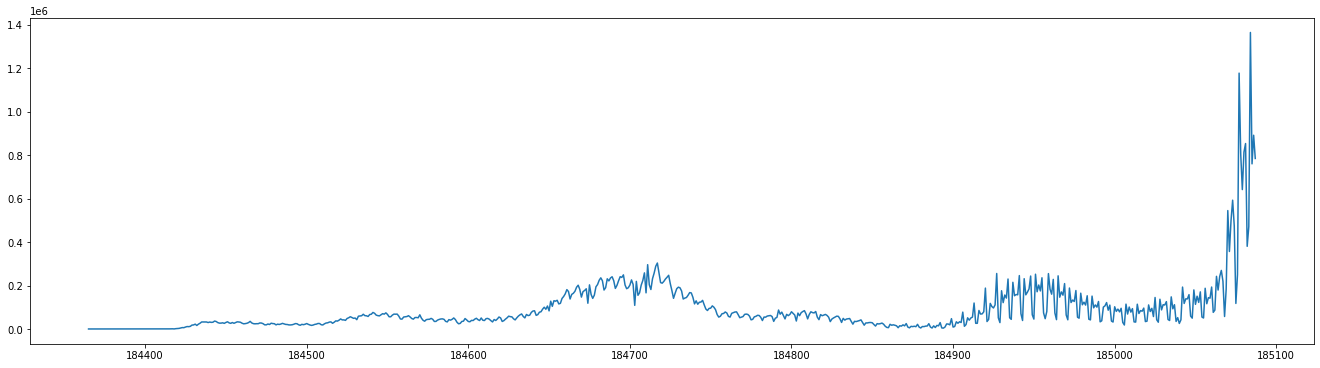

In [ ]:
plt.figure(figsize=(23,6))
covid_df[covid_df["Country"]=="US"]['New cases'].plot()

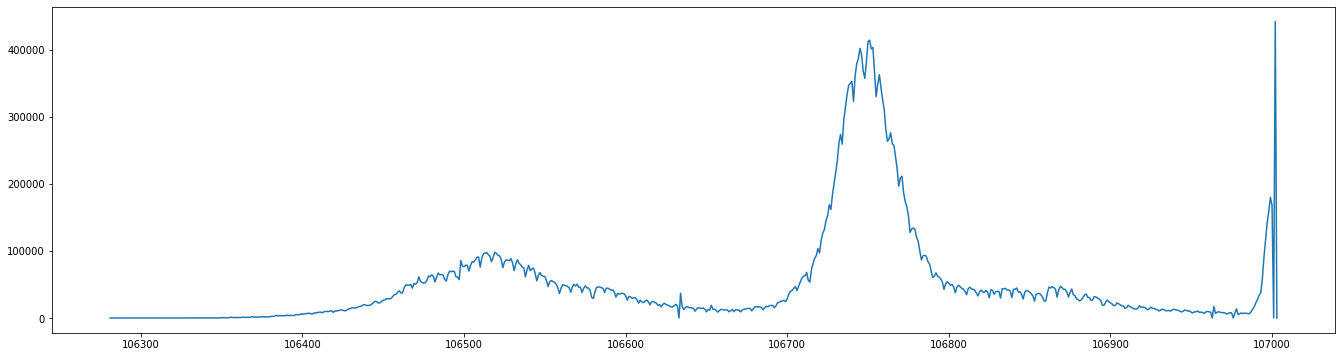

In [ ]:
plt.figure(figsize=(23,6))
covid_df[covid_df["Country"]=="India"]["New cases"].plot()

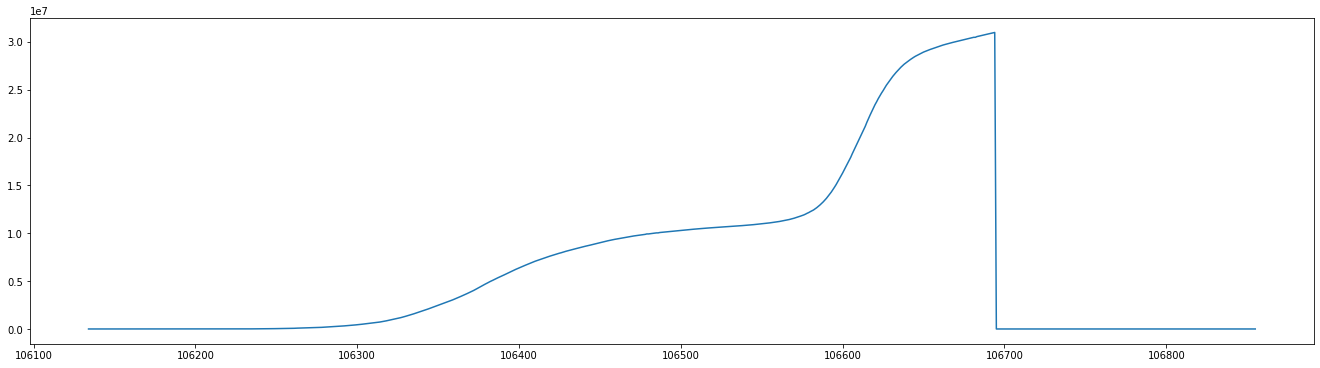

In [ ]:
plt.figure(figsize=(23,6))
covid_df[covid_df["Country"]=="India"]["Total recovered"].plot()